In [1]:
1+1

2

Parameters: {'teeth': 49, 'module': 2.153, 'pressure_angle_deg': 20, 'clearance': 0.094, 'center_hole': 8.0}


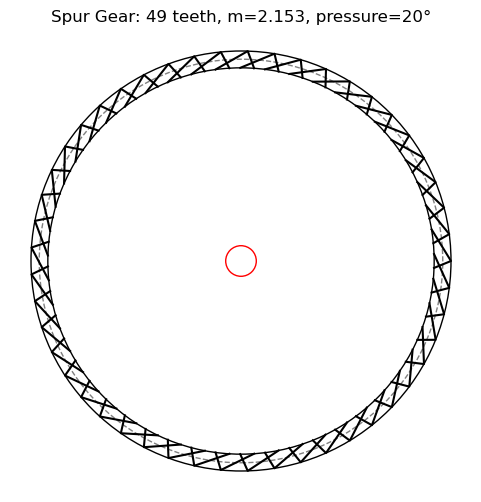

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import pi, cos, sin, tan

def random_gear_parameters():
    params = {
        'teeth': random.randint(10, 60),                   # Teeth count
        'module': round(random.uniform(0.5, 3.0), 3),      # Module in mm
        'pressure_angle_deg': random.choice([14.5, 20, 25]),  # Pressure angle
        'clearance': round(random.uniform(0.0, 0.1), 3),    # Clearance in mm
        'center_hole': round(random.uniform(0, 10), 1)      # Center hole dia
    }
    return params

def generate_gear_profile(teeth, module, pressure_angle_deg, clearance):
    pitch_dia = teeth * module
    addendum = module
    dedendum = module + clearance
    outer_dia = pitch_dia + 2 * addendum
    root_dia = pitch_dia - 2 * dedendum
    
    rp = pitch_dia / 2
    ro = outer_dia / 2
    rr = root_dia / 2
    
    angles = np.linspace(0, 2 * pi, teeth + 1)[:-1]
    profiles = []
    for a in angles:
        theta = a + pi / teeth
        pts = [
            (rr * cos(theta - 0.1), rr * sin(theta - 0.1)),
            (ro * cos(a), ro * sin(a)),
            (rr * cos(theta + 0.1), rr * sin(theta + 0.1))
        ]
        profiles.append(pts)
    return profiles, rp, ro, rr

def draw_gear(params, profiles, rp, ro, rr):
    fig, ax = plt.subplots(figsize=(6, 6))
    # Outer circle
    circle_outer = plt.Circle((0, 0), ro, fill=False, color='black')
    ax.add_patch(circle_outer)
    # Root circle
    circle_root = plt.Circle((0, 0), rr, fill=False, color='black')
    ax.add_patch(circle_root)
    # Pitch circle
    circle_pitch = plt.Circle((0, 0), rp, linestyle='--', fill=False, color='gray')
    ax.add_patch(circle_pitch)
    # Teeth profiles
    for teeth_pts in profiles:
        xs, ys = zip(*teeth_pts)
        ax.plot(xs, ys, 'k-')
    # Center hole, if any
    if params['center_hole'] > 0:
        hole = plt.Circle((0, 0), params['center_hole']/2, fill=False, color='red')
        ax.add_patch(hole)
    ax.set_aspect('equal', 'box')
    ax.set_title(f"Spur Gear: {params['teeth']} teeth, m={params['module']}, pressure={params['pressure_angle_deg']}°")
    plt.axis('off')
    plt.show()

def main():
    params = random_gear_parameters()
    print("Parameters:", params)
    profiles, rp, ro, rr = generate_gear_profile(
        params['teeth'],
        params['module'],
        params['pressure_angle_deg'],
        params['clearance']
    )
    draw_gear(params, profiles, rp, ro, rr)

if __name__ == "__main__":
    main()


In [3]:
%pip install mechanism

Note: you may need to restart the kernel to use updated packages.


/Users/kushagrapandey/opt/anaconda3/lib/python3.13/site-packages/mechanism/gears.py:147: RuntimeWarning: The dedendum circle radius is less than the base circle radius. Undercutting will occur. To fix this, make the gear bigger by increasing the pitch diameter or number of teeth. To ignore this warning, pass "ignore_undercut=True" at the declaration of the gear object.
  warnings.warn('The dedendum circle radius is less than the base circle radius. Undercutting will occur. To '


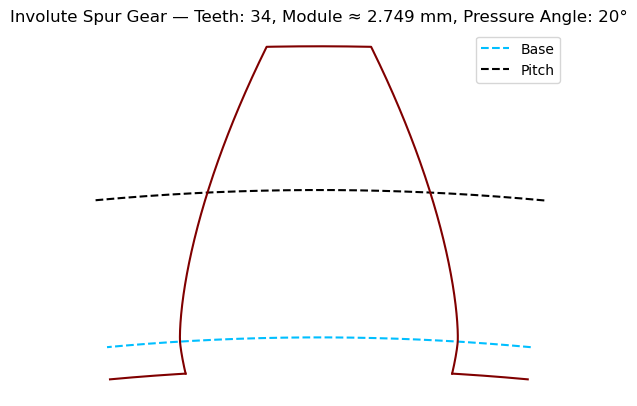

In [6]:
import random
import matplotlib.pyplot as plt
from mechanism import SpurGear

def random_gear_params(agma=True):
    # Random module (mm)
    module = round(random.uniform(0.5, 3.0), 3)
    pd = 25.4 / module

    if agma:
        # AGMA: only 20°/25°, and if pd>=20 then PA must be 20°
        choices = [20] if pd >= 20 else [20, 25]
    else:
        # Non-AGMA lets you use 14.5° too
        choices = [14.5, 20, 25]

    pressure_angle = random.choice(choices)

    return {
        'N': random.randint(10, 60),
        'pd': round(pd, 3),
        'pressure_angle': pressure_angle,
        'agma': agma,
        'size': 500
    }

def draw_involute_gear():
    params = random_gear_params(agma=True)   # keep AGMA on
    gear = SpurGear(
        N=params['N'],
        pd=params['pd'],
        pressure_angle=params['pressure_angle'],
        agma=params['agma'],
        size=params['size']
    )
    fig, ax = gear.plot()
    ax.set_aspect('equal', 'box')
    ax.set_title(
        f"Involute Spur Gear — Teeth: {params['N']}, Module ≈ {round(25.4/params['pd'],3)} mm, "
        f"Pressure Angle: {params['pressure_angle']}°"
    )
    plt.axis('off')
    plt.show()

if __name__ == '__main__':
    draw_involute_gear()


In [7]:
import mechanism
help(mechanism.SpurGear)


Help on class SpurGear in module mechanism.gears:

class SpurGear(builtins.object)
 |  SpurGear(
 |      N=0,
 |      pd=0,
 |      d=0,
 |      pressure_angle=20,
 |      agma=False,
 |      a=0,
 |      b=0,
 |      backlash=0,
 |      internal=False,
 |      ignore_undercut=False,
 |      size=300
 |  )
 |
 |  Methods defined here:
 |
 |  __init__(
 |      self,
 |      N=0,
 |      pd=0,
 |      d=0,
 |      pressure_angle=20,
 |      agma=False,
 |      a=0,
 |      b=0,
 |      backlash=0,
 |      internal=False,
 |      ignore_undercut=False,
 |      size=300
 |  )
 |      In order to fully define the gear,
 |      - at least two of the following should be defined: N, pd, and d
 |      - pressure angle needs to be declared (default value is 20)
 |      - addendum and dedendum needs to be defined (declaring agma to be true will automatically do this)
 |
 |      If backlash is set to zero, and agma is set to True, a non-conservative approximation of the backlash will be
 |      ca

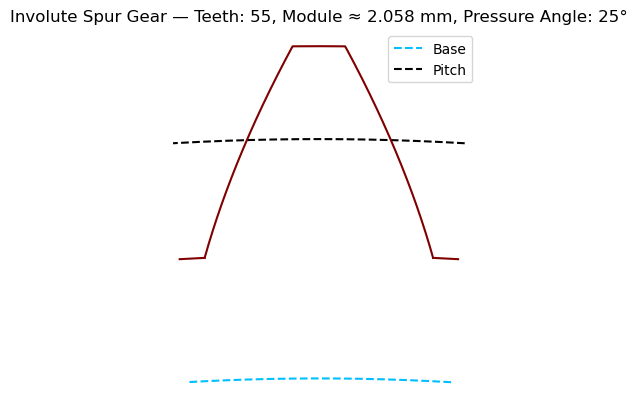

In [8]:
import random
import matplotlib.pyplot as plt
from mechanism import SpurGear

def random_gear_params():
    module = round(random.uniform(0.5, 3.0), 3)        # Module (mm)
    pd = 25.4 / module                                 # Convert module to diametral pitch
    return {
        'N': random.randint(10, 60),                   # Number of teeth
        'pd': round(pd, 3),                            # Diametral pitch
        'pressure_angle': random.choice([20, 25]),    # Pressure angle limited to 20 or 25 degrees
        'size': 500                                    # Involute curve resolution
    }

def draw_full_gear():
    params = random_gear_params()
    gear = SpurGear(
        N=params['N'],
        pd=params['pd'],
        pressure_angle=params['pressure_angle'],
        agma=True,
        size=params['size']
    )
    fig, ax = gear.plot()  # This plots the entire gear
    ax.set_aspect('equal', 'box')
    module_display = round(25.4 / params['pd'], 3)
    ax.set_title(f"Involute Spur Gear — Teeth: {params['N']}, Module ≈ {module_display} mm, Pressure Angle: {params['pressure_angle']}°")
    plt.axis('off')
    plt.show()

if __name__ == '__main__':
    draw_full_gear()


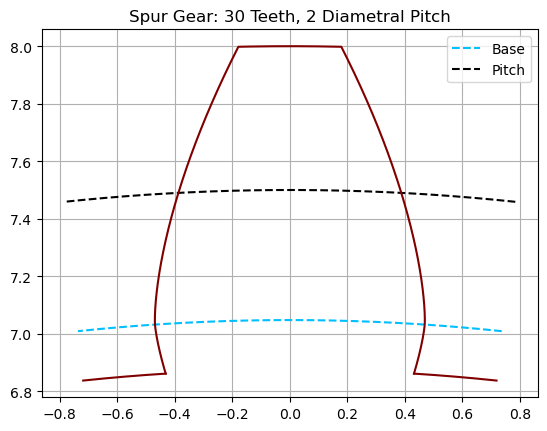

In [9]:
from mechanism import SpurGear
import matplotlib.pyplot as plt

def draw_full_gear():
    # Define gear parameters
    params = {
        'N': 30,  # Number of teeth
        'pd': 2,  # Diametral pitch
        'pressure_angle': 20,  # Pressure angle in degrees
        'size': 500  # Size of the plot
    }

    # Create the gear object
    gear = SpurGear(
        N=params['N'],
        pd=params['pd'],
        pressure_angle=params['pressure_angle'],
        agma=True,
        size=params['size']
    )

    # Plot the gear
    fig, ax = gear.plot()
    ax.set_aspect('equal', 'box')
    ax.set_title(f"Spur Gear: {params['N']} Teeth, {params['pd']} Diametral Pitch")
    plt.show()

if __name__ == '__main__':
    draw_full_gear()


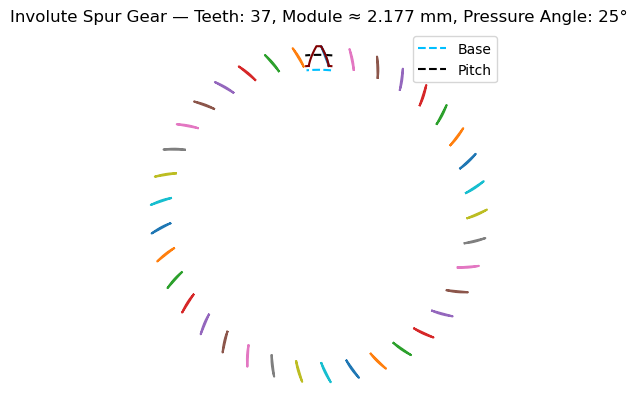

In [11]:
import random, math
import matplotlib.pyplot as plt
import numpy as np
from mechanism import SpurGear

def random_gear_params():
    module = round(random.uniform(0.5, 3.0), 3)   # mm
    pd = 25.4 / module

    # AGMA rule: if pd >= 20 (module <= 1.27 mm), PA must be 20°
    pressure_angle = 20 if pd >= 20 else random.choice([20, 25])

    # Simple no-undercut heuristic: N >= ceil(2 / sin^2(phi))
    n_min = math.ceil(2 / (math.sin(math.radians(pressure_angle)) ** 2))
    N = random.randint(max(16, n_min), 60)

    return {
        'N': N,
        'pd': round(pd, 3),
        'pressure_angle': pressure_angle,
        'size': 500
    }

def draw_full_gear():
    params = random_gear_params()
    gear = SpurGear(
        N=params['N'],
        pd=params['pd'],
        pressure_angle=params['pressure_angle'],
        agma=True,
        size=params['size']
    )

    fig, ax = gear.plot()
    ax.set_aspect('equal', 'box')

    # If you really want to re-plot each tooth yourself:
    tooth_coords = np.column_stack([np.real(gear.involute_points), np.imag(gear.involute_points)])
    tooth_coords = np.vstack([tooth_coords, tooth_coords[0]])

    for i in range(params['N']):
        angle = 2 * np.pi * i / params['N']
        R = np.array([[np.cos(angle), -np.sin(angle)],
                      [np.sin(angle),  np.cos(angle)]])
        rotated = tooth_coords @ R.T
        ax.plot(rotated[:, 0], rotated[:, 1])

    module_display = round(25.4 / params['pd'], 3)
    ax.set_title(f"Involute Spur Gear — Teeth: {params['N']}, Module ≈ {module_display} mm, "
                 f"Pressure Angle: {params['pressure_angle']}°")
    plt.axis('off')
    plt.show()

if __name__ == '__main__':
    draw_full_gear()


In [12]:
%pip install mechanism matplotlib numpy

Note: you may need to restart the kernel to use updated packages.


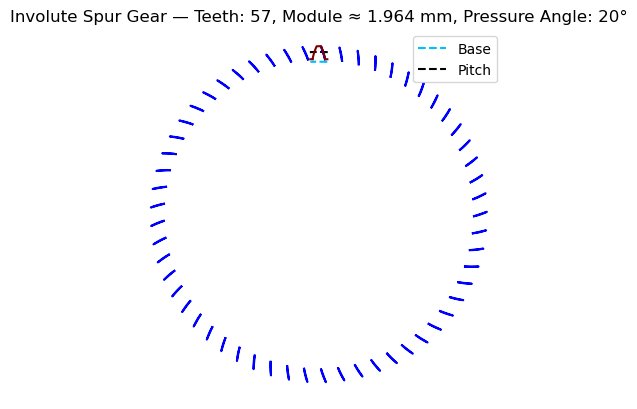

In [13]:
import random
import matplotlib.pyplot as plt
import numpy as np
from mechanism import SpurGear

def random_gear_params():
    module = round(random.uniform(0.5, 3.0), 3)        # Module (mm)
    pd = 25.4 / module                                 # Convert module to diametral pitch
    return {
        'N': random.randint(10, 60),                   # Number of teeth
        'pd': round(pd, 3),                            # Diametral pitch
        'pressure_angle': random.choice([20, 25]),    # Pressure angle limited to 20 or 25 degrees
        'size': 500                                    # Involute curve resolution
    }

def draw_full_gear():
    params = random_gear_params()
    gear = SpurGear(
        N=params['N'],
        pd=params['pd'],
        pressure_angle=params['pressure_angle'],
        agma=True,
        size=params['size']
    )
    
    # Get the tooth profile
    fig, ax = gear.plot()
    ax.set_aspect('equal', 'box')
    
    # Extract the tooth profile coordinates
    tooth_coords = np.array([np.real(gear.involute_points), np.imag(gear.involute_points)]).T
    tooth_coords = np.vstack([tooth_coords, tooth_coords[0]])  # Close the loop

    # Plot all teeth around the center
    for i in range(params['N']):
        angle = 2 * np.pi * i / params['N']
        rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
        rotated_coords = tooth_coords.dot(rotation_matrix)
        ax.plot(rotated_coords[:, 0], rotated_coords[:, 1], color='blue')

    # Set title and hide axes
    module_display = round(25.4 / params['pd'], 3)
    ax.set_title(f"Involute Spur Gear — Teeth: {params['N']}, Module ≈ {module_display} mm, Pressure Angle: {params['pressure_angle']}°")
    plt.axis('off')
    plt.show()

if __name__ == '__main__':
    draw_full_gear()


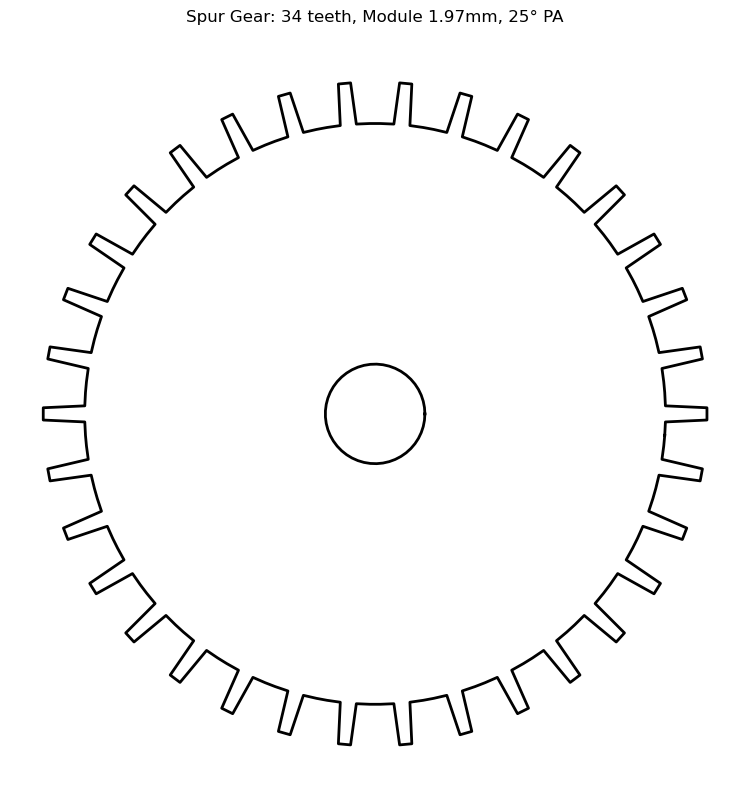

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import random

def generate_gear_profile(num_teeth, module=2.0, pressure_angle=20, addendum_factor=1.0, dedendum_factor=1.25):
    """
    Generate a simple spur gear profile similar to the image shown.
    
    Parameters:
    - num_teeth: Number of gear teeth
    - module: Gear module (mm)
    - pressure_angle: Pressure angle in degrees
    - addendum_factor: Height factor for tooth tip
    - dedendum_factor: Depth factor for tooth root
    """
    
    # Basic gear dimensions
    pitch_radius = (num_teeth * module) / 2
    addendum = addendum_factor * module
    dedendum = dedendum_factor * module
    
    outer_radius = pitch_radius + addendum
    root_radius = pitch_radius - dedendum
    
    # Angular parameters
    tooth_angle = 2 * np.pi / num_teeth
    
    # Generate points for one complete gear
    theta_values = []
    radius_values = []
    
    for i in range(num_teeth):
        base_angle = i * tooth_angle
        
        # Create a simplified tooth profile (trapezoidal approximation)
        # Root circle to pitch circle (rising flank)
        theta1 = base_angle - tooth_angle * 0.4
        theta2 = base_angle - tooth_angle * 0.15
        
        # Pitch circle to outer circle (tooth tip)
        theta3 = base_angle - tooth_angle * 0.1
        theta4 = base_angle + tooth_angle * 0.1
        
        # Outer circle to pitch circle (falling flank)
        theta5 = base_angle + tooth_angle * 0.15
        theta6 = base_angle + tooth_angle * 0.4
        
        # Add points for this tooth
        tooth_theta = [theta1, theta2, theta3, theta4, theta5, theta6]
        tooth_radius = [root_radius, root_radius, outer_radius, outer_radius, root_radius, root_radius]
        
        theta_values.extend(tooth_theta)
        radius_values.extend(tooth_radius)
    
    # Close the gear profile
    theta_values.append(theta_values[0])
    radius_values.append(radius_values[0])
    
    # Convert to Cartesian coordinates
    x = np.array(radius_values) * np.cos(np.array(theta_values))
    y = np.array(radius_values) * np.sin(np.array(theta_values))
    
    return x, y, pitch_radius

def draw_gear_with_center_hole(x, y, center_hole_radius=None):
    """Draw the gear outline with a center hole like in the image"""
    
    if center_hole_radius is None:
        # Make center hole proportional to gear size
        gear_radius = np.max(np.sqrt(x**2 + y**2))
        center_hole_radius = gear_radius * 0.15  # 15% of gear radius
    
    # Create center hole
    theta_hole = np.linspace(0, 2*np.pi, 50)
    x_hole = center_hole_radius * np.cos(theta_hole)
    y_hole = center_hole_radius * np.sin(theta_hole)
    
    return x_hole, y_hole

def random_gear_params():
    """Generate random gear parameters"""
    return {
        'num_teeth': random.randint(12, 40),
        'module': round(random.uniform(1.5, 3.0), 2),
        'pressure_angle': random.choice([20, 25]),
    }

def plot_simple_gear():
    """Generate and plot a simple gear like in the reference image"""
    
    # Generate random or fixed parameters
    params = random_gear_params()
    
    # Generate gear profile
    x, y, pitch_radius = generate_gear_profile(
        num_teeth=params['num_teeth'],
        module=params['module'],
        pressure_angle=params['pressure_angle']
    )
    
    # Generate center hole
    x_hole, y_hole = draw_gear_with_center_hole(x, y)
    
    # Create the plot
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    
    # Plot gear outline
    ax.plot(x, y, 'k-', linewidth=2)
    
    # Plot center hole
    ax.plot(x_hole, y_hole, 'k-', linewidth=2)
    
    # Set equal aspect ratio and clean appearance
    ax.set_aspect('equal')
    ax.axis('off')  # Remove axes like in the reference image
    
    # Optional: add a title with gear specifications
    title = f"Spur Gear: {params['num_teeth']} teeth, Module {params['module']}mm, {params['pressure_angle']}° PA"
    ax.set_title(title, pad=20)
    
    # Set plot limits with some padding
    max_radius = np.max(np.sqrt(x**2 + y**2))
    padding = max_radius * 0.1
    ax.set_xlim(-max_radius - padding, max_radius + padding)
    ax.set_ylim(-max_radius - padding, max_radius + padding)
    
    plt.tight_layout()
    plt.show()
    
    return params

def save_gear_image(filename="gear.png", dpi=300):
    """Generate and save a gear image"""
    params = random_gear_params()
    
    x, y, pitch_radius = generate_gear_profile(
        num_teeth=params['num_teeth'],
        module=params['module'],
        pressure_angle=params['pressure_angle']
    )
    
    x_hole, y_hole = draw_gear_with_center_hole(x, y)
    
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    ax.plot(x, y, 'k-', linewidth=2)
    ax.plot(x_hole, y_hole, 'k-', linewidth=2)
    ax.set_aspect('equal')
    ax.axis('off')
    
    max_radius = np.max(np.sqrt(x**2 + y**2))
    padding = max_radius * 0.1
    ax.set_xlim(-max_radius - padding, max_radius + padding)
    ax.set_ylim(-max_radius - padding, max_radius + padding)
    
    plt.tight_layout()
    plt.savefig(filename, dpi=dpi, bbox_inches='tight', pad_inches=0.1)
    plt.show()
    
    print(f"Gear saved as {filename}")
    print(f"Specifications: {params['num_teeth']} teeth, {params['module']}mm module, {params['pressure_angle']}° pressure angle")

if __name__ == '__main__':
    # Generate and display a random gear
    plot_simple_gear()
    
    # Uncomment to save an image
    # save_gear_image("my_gear.png")

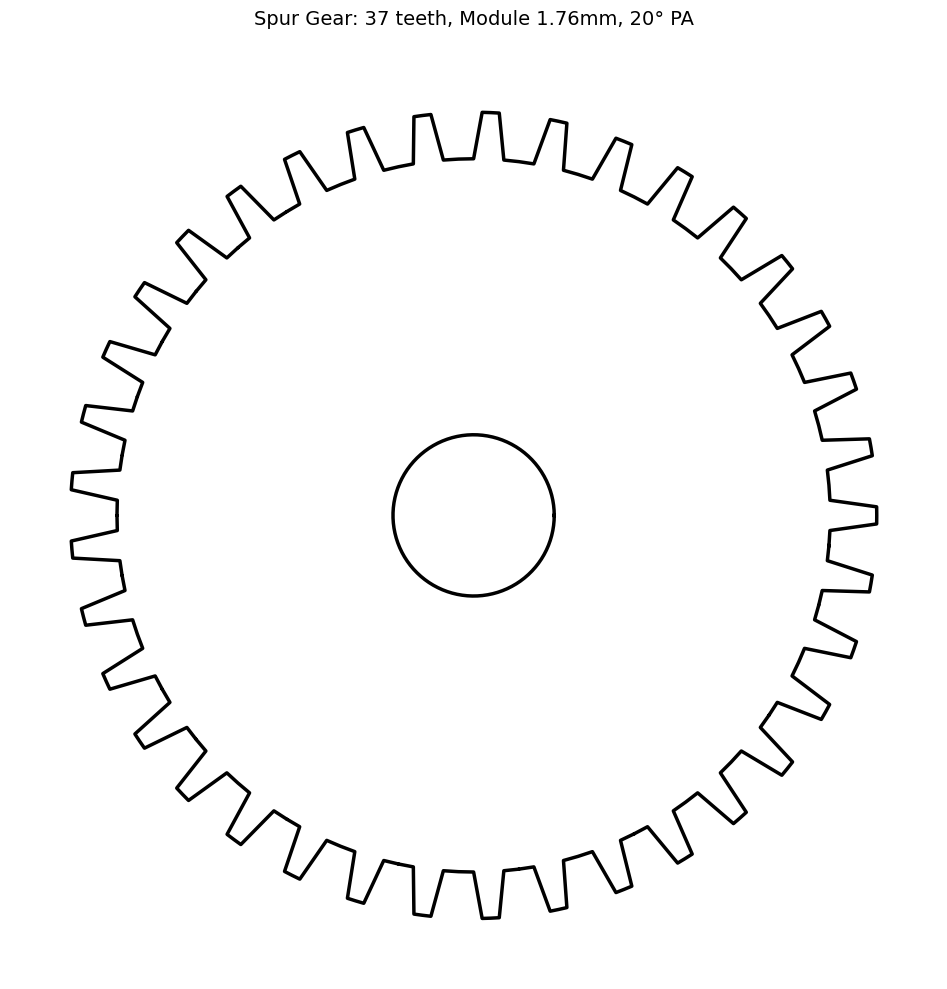

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import random

def involute_function(t):
    """Generate involute curve points"""
    return t - np.sin(t), np.cos(t) - 1

def generate_involute_gear(num_teeth, module=2.0, pressure_angle=20):
    """
    Generate a proper involute spur gear profile
    
    Parameters:
    - num_teeth: Number of gear teeth
    - module: Gear module (mm)
    - pressure_angle: Pressure angle in degrees
    """
    
    # Convert pressure angle to radians
    phi = np.radians(pressure_angle)
    
    # Basic gear dimensions
    pitch_radius = (num_teeth * module) / 2
    addendum = module  # Standard addendum
    dedendum = 1.25 * module  # Standard dedendum
    
    outer_radius = pitch_radius + addendum
    root_radius = pitch_radius - dedendum
    base_radius = pitch_radius * np.cos(phi)
    
    # Ensure base radius is not larger than root radius
    if base_radius < root_radius:
        base_radius = root_radius
    
    # Angular parameters
    pitch_angle = 2 * np.pi / num_teeth
    
    # Calculate involute angles
    inv_phi = np.tan(phi) - phi  # Involute function at pressure angle
    
    # Tooth thickness angle at pitch circle (for standard gears, half the pitch)
    tooth_thick_angle = np.pi / num_teeth
    
    # Generate involute curves
    max_involute_angle = np.sqrt((outer_radius/base_radius)**2 - 1)
    t_vals = np.linspace(0, max_involute_angle, 50)
    
    # Right side of tooth (involute curve)
    x_inv, y_inv = involute_function(t_vals)
    x_inv = base_radius * (x_inv * np.cos(t_vals) + y_inv * np.sin(t_vals))
    y_inv = base_radius * (y_inv * np.cos(t_vals) - x_inv/base_radius * np.sin(t_vals))
    
    # Mirror for left side of tooth
    x_inv_left = x_inv
    y_inv_left = -y_inv
    
    # Generate complete gear profile
    all_x = []
    all_y = []
    
    for i in range(num_teeth):
        tooth_center_angle = i * pitch_angle
        
        # Rotation matrix for this tooth
        cos_angle = np.cos(tooth_center_angle)
        sin_angle = np.sin(tooth_center_angle)
        
        # Right involute (from root to tip)
        start_radius_idx = np.where(np.sqrt(x_inv**2 + y_inv**2) >= root_radius)[0]
        if len(start_radius_idx) > 0:
            start_idx = start_radius_idx[0]
            x_right = x_inv[start_idx:]
            y_right = y_inv[start_idx:]
            
            # Rotate to tooth position and offset by half tooth thickness
            half_thick = tooth_thick_angle / 2
            cos_offset = np.cos(half_thick)
            sin_offset = np.sin(half_thick)
            
            x_rot = x_right * cos_offset - y_right * sin_offset
            y_rot = x_right * sin_offset + y_right * cos_offset
            
            x_final = x_rot * cos_angle - y_rot * sin_angle
            y_final = x_rot * sin_angle + y_rot * cos_angle
            
            all_x.extend(x_final)
            all_y.extend(y_final)
        
        # Tooth tip (straight line at outer radius)
        tip_start_angle = tooth_center_angle + tooth_thick_angle/2
        tip_end_angle = tooth_center_angle - tooth_thick_angle/2
        tip_angles = np.linspace(tip_start_angle, tip_end_angle, 5)
        tip_x = outer_radius * np.cos(tip_angles)
        tip_y = outer_radius * np.sin(tip_angles)
        all_x.extend(tip_x)
        all_y.extend(tip_y)
        
        # Left involute (from tip to root)
        if len(start_radius_idx) > 0:
            x_left = x_inv_left[start_idx:]
            y_left = y_inv_left[start_idx:]
            
            # Reverse order for left side
            x_left = x_left[::-1]
            y_left = y_left[::-1]
            
            # Rotate to tooth position and offset by half tooth thickness
            cos_offset = np.cos(-half_thick)
            sin_offset = np.sin(-half_thick)
            
            x_rot = x_left * cos_offset - y_left * sin_offset
            y_rot = x_left * sin_offset + y_left * cos_offset
            
            x_final = x_rot * cos_angle - y_rot * sin_angle
            y_final = x_rot * sin_angle + y_rot * cos_angle
            
            all_x.extend(x_final)
            all_y.extend(y_final)
        
        # Root fillet (simplified as arc)
        root_start_angle = tooth_center_angle - tooth_thick_angle/2
        root_end_angle = tooth_center_angle + (pitch_angle - tooth_thick_angle/2)
        if root_end_angle > root_start_angle + pitch_angle:
            root_end_angle = tooth_center_angle + pitch_angle - tooth_thick_angle/2
            
        root_angles = np.linspace(root_start_angle, root_end_angle, 10)
        root_x = root_radius * np.cos(root_angles)
        root_y = root_radius * np.sin(root_angles)
        all_x.extend(root_x)
        all_y.extend(root_y)
    
    return np.array(all_x), np.array(all_y), pitch_radius

def generate_simple_accurate_gear(num_teeth, module=2.0, pressure_angle=20):
    """
    Generate a simplified but accurate gear profile that's easier to render
    """
    # Basic dimensions
    pitch_radius = (num_teeth * module) / 2
    addendum = module
    dedendum = 1.25 * module
    
    outer_radius = pitch_radius + addendum
    root_radius = pitch_radius - dedendum
    
    # Angular parameters
    pitch_angle = 2 * np.pi / num_teeth
    tooth_thickness_angle = pitch_angle * 0.5  # Half of pitch for tooth thickness
    
    all_x = []
    all_y = []
    
    for i in range(num_teeth):
        base_angle = i * pitch_angle
        
        # Create tooth profile points
        angles = [
            base_angle - pitch_angle/2,  # Start of tooth space
            base_angle - tooth_thickness_angle/2,  # Start of tooth
            base_angle - tooth_thickness_angle/4,  # Tooth flank
            base_angle,  # Tooth center
            base_angle + tooth_thickness_angle/4,  # Tooth flank
            base_angle + tooth_thickness_angle/2,  # End of tooth
            base_angle + pitch_angle/2   # End of tooth space
        ]
        
        radii = [
            root_radius,  # Root
            root_radius,  # Root to tooth start
            outer_radius, # Tooth flank
            outer_radius, # Tooth tip
            outer_radius, # Tooth flank
            root_radius,  # Tooth to root
            root_radius   # Root
        ]
        
        # Convert to cartesian and add to profile
        for angle, radius in zip(angles, radii):
            all_x.append(radius * np.cos(angle))
            all_y.append(radius * np.sin(angle))
    
    # Close the profile
    all_x.append(all_x[0])
    all_y.append(all_y[0])
    
    return np.array(all_x), np.array(all_y), pitch_radius

def draw_center_hole(gear_radius, hole_ratio=0.2):
    """Draw center hole proportional to gear size"""
    hole_radius = gear_radius * hole_ratio
    theta = np.linspace(0, 2*np.pi, 100)
    x_hole = hole_radius * np.cos(theta)
    y_hole = hole_radius * np.sin(theta)
    return x_hole, y_hole

def random_gear_params():
    """Generate random gear parameters"""
    return {
        'num_teeth': random.randint(20, 50),
        'module': round(random.uniform(1.5, 3.0), 2),
        'pressure_angle': random.choice([20, 25]),
    }

def plot_proper_gear():
    """Generate and plot a proper involute gear"""
    
    params = random_gear_params()
    
    # Generate gear profile using simplified accurate method
    x, y, pitch_radius = generate_simple_accurate_gear(
        num_teeth=params['num_teeth'],
        module=params['module'],
        pressure_angle=params['pressure_angle']
    )
    
    # Generate center hole
    max_radius = np.max(np.sqrt(x**2 + y**2))
    x_hole, y_hole = draw_center_hole(max_radius)
    
    # Create the plot
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    
    # Plot gear outline with thicker line
    ax.plot(x, y, 'k-', linewidth=2.5)
    
    # Plot center hole
    ax.plot(x_hole, y_hole, 'k-', linewidth=2.5)
    
    # Set equal aspect ratio and clean appearance
    ax.set_aspect('equal')
    ax.axis('off')
    
    # Add title
    title = f"Spur Gear: {params['num_teeth']} teeth, Module {params['module']}mm, {params['pressure_angle']}° PA"
    ax.set_title(title, fontsize=14, pad=20)
    
    # Set plot limits with padding
    padding = max_radius * 0.15
    ax.set_xlim(-max_radius - padding, max_radius + padding)
    ax.set_ylim(-max_radius - padding, max_radius + padding)
    
    plt.tight_layout()
    plt.show()
    
    return params

def save_gear_image(filename="proper_gear.png", dpi=300):
    """Generate and save a proper gear image"""
    params = random_gear_params()
    
    x, y, pitch_radius = generate_simple_accurate_gear(
        num_teeth=params['num_teeth'],
        module=params['module'],
        pressure_angle=params['pressure_angle']
    )
    
    max_radius = np.max(np.sqrt(x**2 + y**2))
    x_hole, y_hole = draw_center_hole(max_radius)
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.plot(x, y, 'k-', linewidth=2.5)
    ax.plot(x_hole, y_hole, 'k-', linewidth=2.5)
    ax.set_aspect('equal')
    ax.axis('off')
    
    padding = max_radius * 0.15
    ax.set_xlim(-max_radius - padding, max_radius + padding)
    ax.set_ylim(-max_radius - padding, max_radius + padding)
    
    plt.tight_layout()
    plt.savefig(filename, dpi=dpi, bbox_inches='tight', pad_inches=0.1)
    plt.show()
    
    print(f"Proper gear saved as {filename}")
    print(f"Specifications: {params['num_teeth']} teeth, {params['module']}mm module, {params['pressure_angle']}° pressure angle")

if __name__ == '__main__':
    # Generate and display a proper gear
    plot_proper_gear()
    
    # Uncomment to save an image
    # save_gear_image("my_proper_gear.png")

In [16]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Continuous Spur Gear Generator</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 0;
            padding: 20px;
            background-color: #f5f5f5;
        }
        
        .container {
            max-width: 1200px;
            margin: 0 auto;
            background: white;
            padding: 20px;
            border-radius: 10px;
            box-shadow: 0 2px 10px rgba(0,0,0,0.1);
        }
        
        .controls {
            display: flex;
            gap: 20px;
            margin-bottom: 20px;
            flex-wrap: wrap;
            align-items: center;
        }
        
        .control-group {
            display: flex;
            flex-direction: column;
            gap: 5px;
        }
        
        label {
            font-weight: bold;
            font-size: 12px;
            color: #333;
        }
        
        input, select, button {
            padding: 8px;
            border: 1px solid #ddd;
            border-radius: 4px;
            font-size: 14px;
        }
        
        button {
            background-color: #007bff;
            color: white;
            border: none;
            cursor: pointer;
            padding: 10px 20px;
            font-weight: bold;
        }
        
        button:hover {
            background-color: #0056b3;
        }
        
        #gearCanvas {
            border: 2px solid #ddd;
            border-radius: 8px;
            display: block;
            margin: 20px auto;
            background: white;
        }
        
        .gear-info {
            text-align: center;
            margin-top: 10px;
            font-size: 16px;
            font-weight: bold;
            color: #333;
        }
        
        .download-section {
            text-align: center;
            margin-top: 20px;
        }
        
        #downloadBtn {
            background-color: #28a745;
        }
        
        #downloadBtn:hover {
            background-color: #1e7e34;
        }
    </style>
</head>
<body>
    <div class="container">
        <h1 style="text-align: center; color: #333; margin-bottom: 30px;">Continuous Spur Gear Generator</h1>
        
        <div class="controls">
            <div class="control-group">
                <label for="numTeeth">Number of Teeth:</label>
                <input type="number" id="numTeeth" min="8" max="80" value="40">
            </div>
            
            <div class="control-group">
                <label for="module">Module (mm):</label>
                <input type="number" id="module" min="0.5" max="10" step="0.1" value="2.807">
            </div>
            
            <div class="control-group">
                <label for="pressureAngle">Pressure Angle:</label>
                <select id="pressureAngle">
                    <option value="14.5">14.5°</option>
                    <option value="20">20°</option>
                    <option value="25" selected>25°</option>
                </select>
            </div>
            
            <div class="control-group">
                <label for="canvasSize">Canvas Size:</label>
                <select id="canvasSize">
                    <option value="400">400px</option>
                    <option value="600" selected>600px</option>
                    <option value="800">800px</option>
                </select>
            </div>
            
            <button onclick="generateGear()">Generate Gear</button>
            <button onclick="randomizeGear()">Random Gear</button>
        </div>
        
        <canvas id="gearCanvas" width="600" height="600"></canvas>
        
        <div class="gear-info" id="gearInfo"></div>
        
        <div class="download-section">
            <button id="downloadBtn" onclick="downloadGear()">Download as PNG</button>
        </div>
    </div>

    <script>
        class ContinuousGearGenerator {
            constructor(canvasId) {
                this.canvas = document.getElementById(canvasId);
                this.ctx = this.canvas.getContext('2d');
            }
            
            // Generate continuous gear outline
            generateContinuousGear(numTeeth, module, pressureAngle) {
                // Convert pressure angle to radians
                const phi = pressureAngle * Math.PI / 180;
                
                // Basic dimensions
                const pitchRadius = (numTeeth * module) / 2;
                const addendum = module;
                const dedendum = 1.25 * module;
                
                const outerRadius = pitchRadius + addendum;
                const rootRadius = pitchRadius - dedendum;
                const baseRadius = pitchRadius * Math.cos(phi);
                
                // Angular parameters
                const pitchAngle = 2 * Math.PI / numTeeth;
                const toothThickness = pitchAngle / 2; // Half pitch for tooth thickness
                
                const points = [];
                
                // Generate points for complete gear outline
                for (let i = 0; i < numTeeth; i++) {
                    const baseAngle = i * pitchAngle;
                    
                    // Tooth profile points (going around the tooth)
                    const angles = [
                        baseAngle - pitchAngle / 2,           // Start of space
                        baseAngle - toothThickness / 2,       // Start of tooth (root)
                        baseAngle - toothThickness / 4,       // Rising flank
                        baseAngle,                            // Tooth center (tip)
                        baseAngle + toothThickness / 4,       // Falling flank
                        baseAngle + toothThickness / 2,       // End of tooth (root)
                        baseAngle + pitchAngle / 2            // End of space
                    ];
                    
                    const radii = [
                        rootRadius,    // Space
                        rootRadius,    // Root start
                        outerRadius,   // Flank up
                        outerRadius,   // Tip
                        outerRadius,   // Flank down
                        rootRadius,    // Root end
                        rootRadius     // Space
                    ];
                    
                    // Add points (skip last point to avoid duplication)
                    for (let j = 0; j < angles.length - 1; j++) {
                        points.push({
                            x: radii[j] * Math.cos(angles[j]),
                            y: radii[j] * Math.sin(angles[j])
                        });
                    }
                }
                
                return {
                    points: points,
                    pitchRadius: pitchRadius,
                    outerRadius: outerRadius,
                    rootRadius: rootRadius,
                    baseRadius: baseRadius
                };
            }
            
            generateCenterHole(gearRadius, holeRatio = 0.2) {
                const holeRadius = gearRadius * holeRatio;
                const points = 50;
                const holePoints = [];
                
                for (let i = 0; i <= points; i++) {
                    const theta = (i / points) * 2 * Math.PI;
                    holePoints.push({
                        x: holeRadius * Math.cos(theta),
                        y: holeRadius * Math.sin(theta)
                    });
                }
                
                return holePoints;
            }
            
            drawGear(numTeeth, module, pressureAngle) {
                // Clear canvas
                this.ctx.clearRect(0, 0, this.canvas.width, this.canvas.height);
                
                // Generate gear
                const gear = this.generateContinuousGear(numTeeth, module, pressureAngle);
                
                // Calculate scaling
                const maxRadius = gear.outerRadius;
                const padding = 40;
                const scale = (Math.min(this.canvas.width, this.canvas.height) - 2 * padding) / (2 * maxRadius);
                
                const centerX = this.canvas.width / 2;
                const centerY = this.canvas.height / 2;
                
                // Draw gear outline
                this.ctx.strokeStyle = '#000000';
                this.ctx.lineWidth = 2;
                this.ctx.lineCap = 'round';
                this.ctx.lineJoin = 'round';
                
                this.ctx.beginPath();
                for (let i = 0; i < gear.points.length; i++) {
                    const x = centerX + gear.points[i].x * scale;
                    const y = centerY + gear.points[i].y * scale;
                    
                    if (i === 0) {
                        this.ctx.moveTo(x, y);
                    } else {
                        this.ctx.lineTo(x, y);
                    }
                }
                this.ctx.closePath();
                this.ctx.stroke();
                
                // Draw center hole
                const holePoints = this.generateCenterHole(maxRadius);
                this.ctx.beginPath();
                for (let i = 0; i < holePoints.length; i++) {
                    const x = centerX + holePoints[i].x * scale;
                    const y = centerY + holePoints[i].y * scale;
                    
                    if (i === 0) {
                        this.ctx.moveTo(x, y);
                    } else {
                        this.ctx.lineTo(x, y);
                    }
                }
                this.ctx.closePath();
                this.ctx.stroke();
                
                return {
                    pitchRadius: gear.pitchRadius,
                    outerRadius: gear.outerRadius,
                    rootRadius: gear.rootRadius,
                    baseRadius: gear.baseRadius,
                    pitchDiameter: gear.pitchRadius * 2,
                    outerDiameter: gear.outerRadius * 2
                };
            }
            
            setCanvasSize(size) {
                this.canvas.width = size;
                this.canvas.height = size;
            }
        }
        
        // Initialize gear generator
        const gearGen = new ContinuousGearGenerator('gearCanvas');
        
        function generateGear() {
            const numTeeth = parseInt(document.getElementById('numTeeth').value);
            const module = parseFloat(document.getElementById('module').value);
            const pressureAngle = parseFloat(document.getElementById('pressureAngle').value);
            const canvasSize = parseInt(document.getElementById('canvasSize').value);
            
            // Update canvas size
            gearGen.setCanvasSize(canvasSize);
            
            // Generate gear
            const gearData = gearGen.drawGear(numTeeth, module, pressureAngle);
            
            // Update info display
            const infoDiv = document.getElementById('gearInfo');
            infoDiv.innerHTML = `
                Spur Gear: ${numTeeth} teeth, Module ${module}mm, ${pressureAngle}° PA<br>
                Pitch Diameter: ${gearData.pitchDiameter.toFixed(2)}mm, 
                Outer Diameter: ${gearData.outerDiameter.toFixed(2)}mm<br>
                Base Circle: ${(gearData.baseRadius * 2).toFixed(2)}mm, 
                Root Circle: ${(gearData.rootRadius * 2).toFixed(2)}mm
            `;
        }
        
        function randomizeGear() {
            const numTeeth = Math.floor(Math.random() * (60 - 12 + 1)) + 12;
            const module = Math.round((Math.random() * (4.0 - 1.0) + 1.0) * 100) / 100;
            const pressureAngles = [14.5, 20, 25];
            const pressureAngle = pressureAngles[Math.floor(Math.random() * pressureAngles.length)];
            
            document.getElementById('numTeeth').value = numTeeth;
            document.getElementById('module').value = module;
            document.getElementById('pressureAngle').value = pressureAngle;
            
            generateGear();
        }
        
        function downloadGear() {
            const tempCanvas = document.createElement('canvas');
            const tempCtx = tempCanvas.getContext('2d');
            
            tempCanvas.width = gearGen.canvas.width;
            tempCanvas.height = gearGen.canvas.height;
            
            tempCtx.fillStyle = '#FFFFFF';
            tempCtx.fillRect(0, 0, tempCanvas.width, tempCanvas.height);
            tempCtx.drawImage(gearGen.canvas, 0, 0);
            
            const link = document.createElement('a');
            const params = {
                teeth: document.getElementById('numTeeth').value,
                module: document.getElementById('module').value,
                pa: document.getElementById('pressureAngle').value
            };
            link.download = `spur_gear_${params.teeth}T_${params.module}m_${params.pa}PA.png`;
            link.href = tempCanvas.toDataURL();
            link.click();
        }
        
        // Generate initial gear
        window.onload = function() {
            generateGear();
        };
        
        // Event listeners
        document.getElementById('numTeeth').addEventListener('input', generateGear);
        document.getElementById('module').addEventListener('input', generateGear);
        document.getElementById('pressureAngle').addEventListener('change', generateGear);
        document.getElementById('canvasSize').addEventListener('change', generateGear);
    </script>
</body>
</html>

SyntaxError: invalid decimal literal (2728043814.py, line 11)